In [ ]:
# Victor Z
# UW-Madison, 2024
# least-squares fit of weibull
# used GPT to translate Matlab to Python file

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import weibull_min

# Generate observations for Weibull
# note there are discrepancies with Matlab due to use of different samples
S = 100
np.random.seed(1)

beta = 1  # scale
xi = 2    # shape

xdata = weibull_min.rvs(c=xi, scale=beta, size=S)

# Assume Weibull model and fit to cdf

# Generate thresholds and ecdf at thresholds
N = 20
t = np.linspace(np.min(xdata), np.max(xdata), N)

F = np.array([(xdata <= threshold).sum() / S for threshold in t])

# Drop last term
t = t[:-1]
F = F[:-1]

In [3]:
# Define the function to optimize by LS
def lsfunc(theta, t, F):
    Fmod = weibull_min.cdf(t, c=theta[1], scale=theta[0])
    e = (F - Fmod) ** 2
    LS = 0.5 * np.sum(e)
    return LS

In [4]:
# Solve least squares problem
theta_initial = [1, 1]  # initial guess for parameters
result = minimize(lsfunc, theta_initial, args=(t, F), method='SLSQP', options={'disp': True, 'ftol': 1e-10})

# Get optimal estimates
betahat, xihat = result.x
print(f'betahat: {betahat}')
print(f'xihat: {xihat}')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0015443062247700375
            Iterations: 8
            Function evaluations: 24
            Gradient evaluations: 8
betahat: 0.9758581745178778
xihat: 1.9221762953177266


In [6]:
# Alternatively, solve least-squares problem (analytically) using log transformation
x = np.log(t)
y = np.log(-np.log(1 - F))

my = np.mean(y)
mx = np.mean(x)
theta1 = np.sum(x * (y - my)) / np.sum(x * (x - mx))
theta0 = my - theta1 * mx

# Get estimates
xilin = theta1
betalin = np.exp(-theta0 / xilin)
print(f'betalin: {betalin}')
print(f'xilin: {xilin}')

xilin: 1.3347342915137137
betalin: 0.9449385567060904


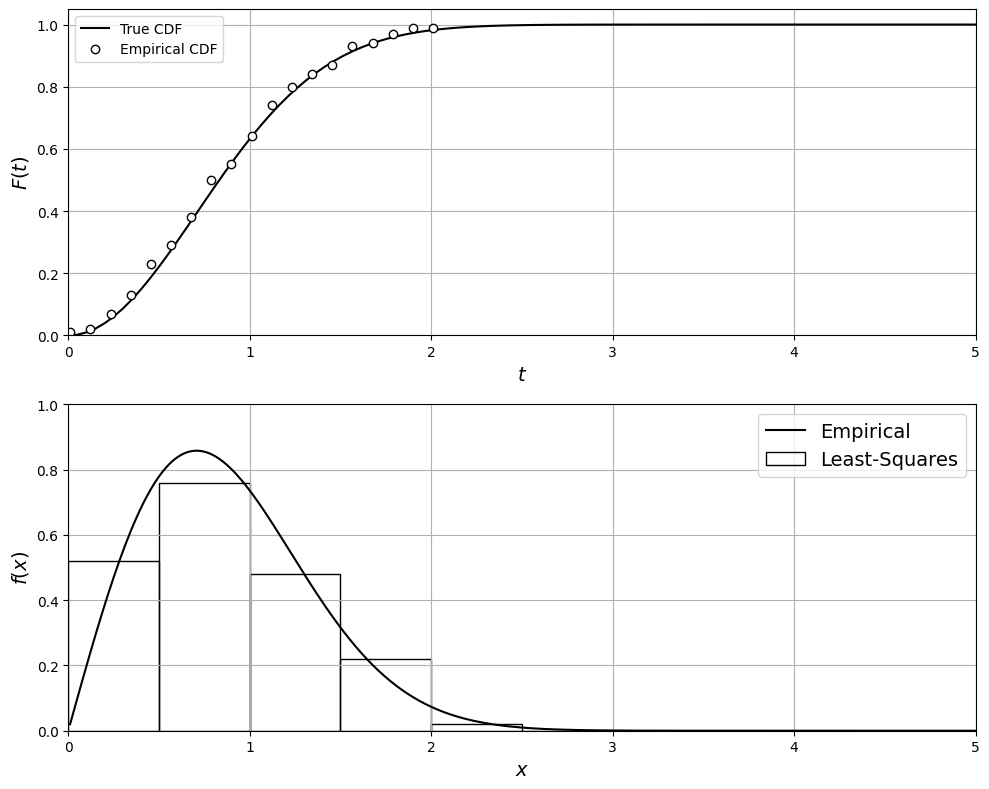

In [7]:
# Compare model cdf (with LS estimates) to empirical cdf
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
tgrid = np.linspace(0, 5, 100)
plt.plot(tgrid, weibull_min.cdf(tgrid, c=xi, scale=beta), 'black', linewidth=1.5, label='True CDF')
plt.plot(t, F, 'o', markerfacecolor='w', markeredgecolor='black', label='Empirical CDF')
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$F(t)$', fontsize=14)
plt.axis([0, 5, 0, 1.05])
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
xgrid = np.linspace(0.01, 16, 1000)
plt.hist(xdata, bins=np.arange(0, 5, 0.5), density=True, edgecolor='black', facecolor='none', linewidth=1)
plt.plot(xgrid, weibull_min.pdf(xgrid, c=xi, scale=beta), 'black', linewidth=1.5)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.axis([0, 5, 0, 1])
plt.grid(True)
plt.legend(['Empirical', 'Least-Squares'], loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()